<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [227]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

#### Reading in all CSV files ####

health11 = pd.read_csv('data/2011 NC Health.csv')
health12 = pd.read_csv('data/2012 NC Health.csv')
health13 = pd.read_csv('data/2013 NC Health.csv')
health14 = pd.read_csv('data/2014 NC Health.csv')
health15 = pd.read_csv('data/2015 NC Health.csv')
health16 = pd.read_csv('data/2016 NC Health.csv')
health17 = pd.read_csv('data/2017 NC Health.csv')
health18 = pd.read_csv('data/2018 NC Health.csv')
health19 = pd.read_csv('data/2019 NC Health.csv')
health20 = pd.read_csv('data/2020 NC Health.csv')
covid = pd.read_csv('data/COVID_COUNTY.csv') # Current COVID death and occurence counts
cancer = pd.read_csv('data/Cancer 100,000 NC.csv') # Based on 5-year data (2013-2017)

#### Removing unwanted Columns ####

health11 = health11.drop(['Alcohol_usage','Pop_AA','Pop_H','Pop_65','Obesity','Smoking','Diabetes','uninsured'], axis = 1)
health12 = health12.drop(columns = ['Pop_65','Pop_AA','Pop_H','Smoking','Obesity','Diabetes', 'uninsured'] , axis = 1)
health13 = health13.drop(columns = ['Pop_65_%','Pop_AA_%','Pop_H_%','Smoking_%','Obesity_%', 'Diabetes_%', 'uninsured_%', 'Alcohol_Abuse_%'], axis = 1)
health14 = health14.drop(columns = ['Pop_AA_%','Pop_H_%','Pop_65_%','Obesity_%', 'Smoking_%', 'Diabetes_%'], axis = 1)
health15 = health15.drop(columns =['Pop_65_%','Obesity_%', 'Smoking_%', 'Diabetes_%'], axis = 1)
health16 = health16.drop(columns = ['Pop_65_%', 'Smoking_%', 'Obesity_%', 'Diabetes_%'], axis = 1)
health17 = health17.drop(columns = ['Pop_65_%','Smoking_%', 'Obesity_%', 'Diabetes_%'], axis = 1)
health18 = health18.drop(columns = ['Pop_65_%','Smoking_%', 'Obesity_%', 'Diabetes_%'], axis = 1)
health19 = health19.drop(columns = ['Pop_65_%','Smoking_%', 'Obesity_%', 'Diabetes_%'], axis = 1)
health20 = health20.drop(columns = ['Pop_65_%','Smoking_%', 'Obesity_%', 'Diabetes_%'], axis = 1)

#### Reorganizing Columns ####

health11 =  health11[['County','Pop','Pop_65_num','Pop_AA_num', 'Pop_H_num', 'Smoker_num', 'Obesity_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'Med_HHI', 'PCP_num', 'Year','Limited_healthy_food', 'psed']]
health12 =  health12[['County','Pop','Pop_65_num','Pop_AA_num', 'Pop_H_num', 'Smoker_num', 'Obesity_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'Med_HHI', 'PCP_num', 'Year', 'Limited_healthy_food', 'psed']]
health13 =  health13[['County','Pop','Pop_65_num','Pop_AA_num', 'Pop_H_num', 'Smoker_num', 'Obesity_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'Med_HHI', 'PCP_num', 'Year', 'Limited_healthy_food', 'psed']]
health14 =  health14[['County','Pop','Pop_65_num','Pop_AA_num', 'Pop_H_num', 'Smoker_num', 'Obesity_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'Med_HHI', 'PCP_num', 'Year', 'Limited_healthy_food', 'psed']]
health15 =  health15[['County','Pop','Pop_65_num','Pop_AA_num', 'Pop_H_num', 'Smoker_num', 'Obesity_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'Med_HHI', 'PCP_num', 'Year', 'Limited_healthy_food', 'psed']]
health16 =  health16[['County','Pop','Pop_65_num','Pop_AA_num', 'Pop_H_num', 'Smoker_num', 'Obesity_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'Med_HHI', 'PCP_num', 'Year', 'Limited_healthy_food', 'psed']]
health17 =  health17[['County','Pop','Pop_65_num','Pop_AA_num', 'Pop_H_num', 'Smoker_num', 'Obesity_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'Med_HHI', 'PCP_num', 'Year', 'Limited_healthy_food', 'psed']]
health18 =  health18[['County','Pop','Pop_65_num','Pop_AA_num', 'Pop_H_num', 'Smoker_num', 'Obesity_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'Med_HHI', 'PCP_num', 'Year', 'Limited_healthy_food', 'psed']]
health19 =  health19[['County','Pop','Pop_65_num','Pop_AA_num', 'Pop_H_num', 'Smoker_num', 'Obesity_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'Med_HHI', 'PCP_num', 'Year', 'Limited_healthy_food', 'psed']]
health20 =  health20[['County','Pop','Pop_65_num','Pop_AA_num', 'Pop_H_num', 'Smoker_num', 'Obesity_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'Med_HHI', 'PCP_num', 'Year', 'Limited_healthy_food', 'psed']]

#### Joining all datasets ####

health = pd.concat([health11,health12,health13,health14,health15,health16,health17,health18,health19,health20], axis = 0)
health = health.fillna(0)

#### Getting average value for each county for every variable for 9 years worth of data ####

health = health.groupby('County')[['Pop','Pop_65_num','Pop_AA_num', 'Pop_H_num', 'Smoker_num', 'Obesity_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'Med_HHI', 'PCP_num', 'Limited_healthy_food', 'psed']].mean()

#### Joining COVID data w/health data #### 

health_covid = health.merge(covid, left_index = True, right_on = 'County')
health_covid = health_covid.replace(',','', regex=True)
health_covid.astype({'Cases Per 100,000 Residents': 'float64', 'Cases': 'float64', 'Cases Per 10,000 Residents': 'float64', 'Deaths': 'float64'}).dtypes
health_covid

#### Adding Cancer data ####

health_covid = pd.concat([health_covid,cancer['Cancer_per_100,000']], axis = 1)



In [228]:
health_covid = health_covid[['County','Pop','Pop_65_num','Pop_AA_num','Pop_H_num','Smoker_num','Obesity_num','Diabetes_num','Cancer_per_100,000','HIV','uninsured_num','Med_HHI','PCP_num','Limited_healthy_food','psed','Cases', 'Cases Per 100,000 Residents', 'Cases Per 10,000 Residents','Deaths']]
health_covid = round(health_covid)
health_covid_1 = health_covid[['County','Pop','Pop_65_num','Pop_AA_num','Pop_H_num','Smoker_num','Obesity_num','Diabetes_num','Cancer_per_100,000','HIV','uninsured_num','Med_HHI','PCP_num','Limited_healthy_food','psed','Cases', 'Cases Per 100,000 Residents', 'Cases Per 10,000 Residents','Deaths']]
health_covid_1 = round(health_covid)

In [229]:
health_covid.head(3)

,County,Pop,Pop_65_num,Pop_AA_num,Pop_H_num,Smoker_num,Obesity_num,Diabetes_num,"Cancer_per_100,000",HIV,uninsured_num,Med_HHI,PCP_num,Limited_healthy_food,psed,Cases,"Cases Per 100,000 Residents","Cases Per 10,000 Residents",Deaths
0,Alamance,156489.0,24537.0,29772.0,18870.0,32908.0,52021.0,18027.0,494.0,281.0,25111.0,43676.0,76.0,21684.0,22226.0,5493,3241,324,89
1,Alexander,37121.0,6550.0,2134.0,1605.0,8122.0,11305.0,4346.0,469.0,51.0,5627.0,43226.0,12.0,3201.0,4095.0,1024,2731,273,10
2,Alleghany,10960.0,2579.0,165.0,1061.0,2532.0,2882.0,1271.0,417.0,0.0,2125.0,35287.0,23.0,1597.0,1066.0,326,2927,293,1


In [230]:
#### Scaling data to determine which variables have the most impact on the model ####

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

col_to_transform = ['Pop','Pop_65_num','Pop_AA_num','Pop_H_num','Smoker_num', 'Diabetes_num','Cancer_per_100,000', 'HIV', 'uninsured_num', 'PCP_num', 'Limited_healthy_food', 'Cases','Cases Per 100,000 Residents']

health_covid[col_to_transform] = scaler.fit_transform(health_covid[col_to_transform])
health_covid.head(3)

,County,Pop,Pop_65_num,Pop_AA_num,Pop_H_num,Smoker_num,Obesity_num,Diabetes_num,"Cancer_per_100,000",HIV,uninsured_num,Med_HHI,PCP_num,Limited_healthy_food,psed,Cases,"Cases Per 100,000 Residents","Cases Per 10,000 Residents",Deaths
0,Alamance,0.152917,0.242916,0.096575,0.149274,0.216065,52021.0,0.206351,0.709677,0.089690,0.164114,43676.0,0.098226,0.227017,22226.0,0.152051,0.585301,324,89
1,Alexander,0.033098,0.059246,0.006811,0.011182,0.051187,11305.0,0.044958,0.575269,0.016278,0.032628,43226.0,0.010914,0.033423,4095.0,0.025299,0.461183,273,10
2,Alleghany,0.006838,0.018697,0.000416,0.006831,0.014003,2882.0,0.008683,0.295699,0.000000,0.008996,35287.0,0.025921,0.016623,1066.0,0.005502,0.508883,293,1


In [231]:
#### creating training datasets for death predicitons ####

health_covid_deaths_trainx = health_covid[['Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num', 'Cases']][:60]
health_covid_deaths_testx = health_covid[['Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num','Cases']][60:]
health_covid1 = health_covid[['Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num','Cases']]

#### creating testing datasets ####

health_covid_deaths_trainy = health_covid[['Deaths']][:60]
health_covid_deaths_testy = health_covid[['Deaths']][60:]

#### Creating Linear Regression Object and Creating model ####

reg = linear_model.LinearRegression()
reg.fit(health_covid_deaths_trainx,health_covid_deaths_trainy)

#### Making Predictions about deaths ####

deaths_y_pred = reg.predict(health_covid1)
deaths_y_pred = pd.DataFrame(deaths_y_pred).rename(columns= {0:'Predicted_deaths'})
# The coefficients
print('Coefficients: \n', reg.coef_)
#The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(health_covid[['Deaths']],deaths_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(health_covid[['Deaths']],deaths_y_pred))
#### The Y-intercept ####
print('Y-intercept: \n', reg.intercept_)



Coefficients: 
 [[-303.98095648  322.39853306  454.26124644 -288.86132596  246.20809924
  -383.79788472 -100.11449821  455.61140677]]
Mean squared error: 320.72
Coefficient of determination: 0.90
Y-intercept: 
 [-0.97868401]


In [232]:
#### Creating dataframe Death and health_covid_1 (unscaled version of health_covid)####

Deaths = pd.concat([health_covid[['County','Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num','Cases']],health_covid.Deaths,round(deaths_y_pred)], axis = 1)
Deaths = Deaths.astype({'Cases':'float64','Deaths':'float64'})
health_covid_1 = pd.concat([health_covid_1,round(deaths_y_pred)], axis = 1)
health_covid_1 = health_covid_1.astype({'Cases':'float64','Cases Per 100,000 Residents':'float64','Cases Per 10,000 Residents':'float64','Deaths':'float64'})
health_covid_1

,County,Pop,Pop_65_num,Pop_AA_num,Pop_H_num,Smoker_num,Obesity_num,Diabetes_num,"Cancer_per_100,000",HIV,uninsured_num,Med_HHI,PCP_num,Limited_healthy_food,psed,Cases,"Cases Per 100,000 Residents","Cases Per 10,000 Residents",Deaths,Predicted_deaths
0,Alamance,156489.0,24537.0,29772.0,18870.0,32908.0,52021.0,18027.0,494.0,281.0,25111.0,43676.0,76.0,21684.0,22226.0,5493.0,3241.0,324.0,89.0,88.0
1,Alexander,37121.0,6550.0,2134.0,1605.0,8122.0,11305.0,4346.0,469.0,51.0,5627.0,43226.0,12.0,3201.0,4095.0,1024.0,2731.0,273.0,10.0,20.0
2,Alleghany,10960.0,2579.0,165.0,1061.0,2532.0,2882.0,1271.0,417.0,0.0,2125.0,35287.0,23.0,1597.0,1066.0,326.0,2927.0,293.0,1.0,3.0
3,Anson,25607.0,4124.0,12383.0,833.0,5249.0,9076.0,3633.0,452.0,173.0,3648.0,34621.0,17.0,3713.0,2860.0,747.0,3056.0,306.0,12.0,20.0
4,Ashe,26815.0,6097.0,199.0,1310.0,5517.0,6868.0,3009.0,446.0,18.0,4706.0,36406.0,18.0,4280.0,3063.0,513.0,1886.0,189.0,3.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Wayne,122031.0,17577.0,38343.0,12726.0,26571.0,42263.0,15643.0,487.0,340.0,19310.0,40348.0,62.0,15332.0,18200.0,4851.0,3940.0,394.0,91.0,78.0
96,Wilkes,68364.0,13147.0,2873.0,4063.0,16190.0,20907.0,8550.0,420.0,48.0,11212.0,37747.0,32.0,10336.0,8134.0,1937.0,2831.0,283.0,41.0,37.0
97,Wilson,80959.0,12966.0,31702.0,8058.0,13840.0,27392.0,10528.0,450.0,327.0,13213.0,39871.0,37.0,6636.0,10201.0,3248.0,3971.0,397.0,69.0,52.0
98,Yadkin,37805.0,6746.0,1222.0,3942.0,8398.0,11981.0,4082.0,442.0,39.0,6181.0,42912.0,16.0,940.0,4549.0,1123.0,2981.0,298.0,11.0,21.0


In [233]:
Deaths['Difference'] = Deaths.Deaths.sub(Deaths.Predicted_deaths, fill_value = None)
Deaths = Deaths[:100] 

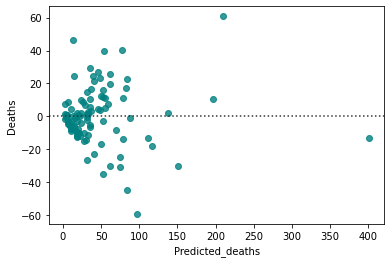

In [319]:
sns.residplot(Deaths.Predicted_deaths,Deaths.Deaths, color = 'teal');

In [235]:
#### Counties which are outliers from the mean Predicted deaths per county ####

outliers = Deaths[(Deaths.Difference <= -60) | (Deaths.Difference >= 60)][['County','Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num','Cases']]
outliers

#### Wake County is the only outlier in the model ####

,County,Pop,Pop_65_num,Smoker_num,Diabetes_num,HIV,uninsured_num,PCP_num,Cases
91,Wake,0.988055,0.985051,0.908954,0.895185,0.591765,0.787757,0.905866,0.628822


In [236]:
coefficients = [-303.98095648,322.39853306,454.26124644,-288.86132596,246.20809924
  ,-383.79788472,-100.11449821,455.61140677]

Variable = ['Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num','Cases']

In [237]:
outliers = outliers.mean()
outliers

Pop              0.988055
Pop_65_num       0.985051
Smoker_num       0.908954
Diabetes_num     0.895185
HIV              0.591765
uninsured_num    0.787757
PCP_num          0.905866
Cases            0.628822
dtype: float64

In [238]:
#### Verification for the outlier Wake County which factors had the greatest impact on it in the model ####
outliers = [0.988055
,0.985051
,0.908954
,0.895185
,0.591765
,0.787757
,0.905866
,0.628822]

Variable = pd.DataFrame(Variable).rename(columns = {0:'Variables'})
coefficients = pd.DataFrame(coefficients).rename(columns = {0:'Coefficients'})

outliers = pd.DataFrame(outliers).rename(columns ={0:'Averages'})
impact_outliers = pd.concat([Variable,coefficients,outliers], axis = 1)
impact_outliers['effect'] = abs(impact_outliers.Coefficients*impact_outliers.Averages)
impact_outliers.sort_values('effect',ascending =False)[:3]

,Variables,Coefficients,Averages,effect
2,Smoker_num,454.261246,0.908954,412.902577
1,Pop_65_num,322.398533,0.985051,317.578997
5,uninsured_num,-383.797885,0.787757,302.339470


In [345]:
#### Counties which are 1 standard deviation above the mean number of Predicted_deaths per county ####

std_1a = Deaths[(Deaths.Difference > 0) & (Deaths.Difference <= 20)]
len(std_1a)


31

In [240]:
#### Which of the variables used to create the model had the most affect on group one standard deviation above the predicted rdeath result  ####
std_1a = std_1a[['Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num','Cases']]

std_1a = std_1a.mean()
std_1a

Pop              0.082904
Pop_65_num       0.130637
Smoker_num       0.115220
Diabetes_num     0.114702
HIV              0.069963
uninsured_num    0.086023
PCP_num          0.061876
Cases            0.072709
dtype: float64

In [241]:
#### Verifying which factors had the greatest impact on the 1 standard deviation above group ####

std_1a = [0.082904
,0.130637
,0.115220
,0.114702
,0.069963
,0.086023
,0.061876
,0.072709]

Variable = pd.DataFrame(Variable).rename(columns = {0:'Variables'})
coefficients = pd.DataFrame(coefficients).rename(columns = {0:'Coefficients'})
std_1a = pd.DataFrame(std_1a)
impact_1a = pd.concat([Variable,coefficients,std_1a], axis = 1).rename(columns = {0:'Averages'})
impact_1a['effect'] = abs(impact_1a.Coefficients*impact_1a.Averages)
impact_1a.sort_values('effect',ascending =False)[:3]


,Variables,Coefficients,Averages,effect
2,Smoker_num,454.261246,0.115220,52.339981
1,Pop_65_num,322.398533,0.130637,42.117177
3,Diabetes_num,-288.861326,0.114702,33.132972


In [351]:
 #### Counties which are 1 standard deviation below the mean for Predicted deaths per county####
    
std_1b = Deaths[(Deaths.Difference < 0) & (Deaths.Difference >= -20)]
std_1b

,County,Pop,Pop_65_num,Smoker_num,Diabetes_num,HIV,uninsured_num,PCP_num,Cases,Deaths,Predicted_deaths,Difference,Death Percent Predicted,Death Percent Actual
1,Alexander,0.033098,0.059246,0.051187,0.044958,0.016278,0.032628,0.010914,0.025299,10.0,20.0,-10.0,0.053878,0.026939
2,Alleghany,0.006838,0.018697,0.014003,0.008683,0.000000,0.008996,0.025921,0.005502,1.0,3.0,-2.0,0.027372,0.009124
3,Anson,0.021540,0.034473,0.032076,0.036547,0.055219,0.019273,0.017735,0.017443,12.0,20.0,-8.0,0.078104,0.046862
4,Ashe,0.022753,0.054620,0.033859,0.029186,0.005745,0.026413,0.019100,0.010806,3.0,11.0,-8.0,0.041022,0.011188
5,Avery,0.013583,0.027805,0.022224,0.018073,0.009575,0.016864,0.009550,0.015202,2.0,11.0,-9.0,0.062217,0.011312
8,Bladen,0.029840,0.055110,0.045846,0.053263,0.043728,0.031805,0.015007,0.028050,19.0,23.0,-4.0,0.067895,0.056087
14,Camden,0.006085,0.007332,0.007484,0.006830,0.017555,0.003799,0.004093,0.000340,3.0,4.0,-1.0,0.039177,0.029383
16,Caswell,0.018933,0.036454,0.032508,0.028737,0.027450,0.016574,0.002729,0.014834,5.0,18.0,-13.0,0.078227,0.021730
17,Catawba,0.152853,0.245693,0.203080,0.191098,0.051388,0.158080,0.126876,0.134664,62.0,69.0,-7.0,0.044110,0.039635
19,Cherokee,0.023210,0.064637,0.035509,0.035190,0.008937,0.023990,0.019100,0.018889,15.0,18.0,-3.0,0.066004,0.055003


In [243]:
std_1b = std_1b[['County','Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num','Cases']]
std_1b = std_1b.mean()
std_1b

Pop              0.076217
Pop_65_num       0.105496
Smoker_num       0.094437
Diabetes_num     0.092278
HIV              0.065915
uninsured_num    0.076100
PCP_num          0.071840
Cases            0.065017
dtype: float64

In [244]:
#### Verifying which factors had the biggest impact on the one standard deviation below group ####

std_1b = [0.076217
,0.105496
,0.094437
,0.092278
,0.065915
,0.076100
,0.071840
,0.065017]

std_1b = pd.DataFrame(std_1b).rename(columns = {0:'Averages'})
impact_1b = pd.concat([Variable,coefficients,std_1b],axis = 1)
impact_1b['effect'] = abs(impact_1b['Coefficients']*impact_1b['Averages'])
impact_1b.sort_values('effect',ascending = False)[:3]

,Variables,Coefficients,Averages,effect
2,Smoker_num,454.261246,0.094437,42.899069
1,Pop_65_num,322.398533,0.105496,34.011756
7,Cases,455.611407,0.065017,29.622487


In [350]:
#### Counties with deaths being 2 standard deviations above the mean predicted deaths per county ####
std_2a = Deaths[(Deaths.Difference >= 20) & (Deaths.Difference <= 40)]
std_2a

,County,Pop,Pop_65_num,Smoker_num,Diabetes_num,HIV,uninsured_num,PCP_num,Cases,Deaths,Predicted_deaths,Difference,Death Percent Predicted,Death Percent Actual
10,Buncombe,0.244095,0.441219,0.308262,0.264970,0.122566,0.245357,0.379263,0.120625,109.0,84.0,25.0,0.033964,0.044072
18,Chatham,0.064395,0.142366,0.077476,0.079523,0.032876,0.063158,0.054570,0.053038,62.0,40.0,22.0,0.058564,0.090775
22,Cleveland,0.093869,0.159041,0.140790,0.143462,0.054899,0.087020,0.064120,0.093454,88.0,61.0,27.0,0.062459,0.090105
23,Columbus,0.052327,0.092616,0.082079,0.089291,0.066071,0.054540,0.030014,0.047734,64.0,39.0,25.0,0.069299,0.113721
42,Harnett,0.121365,0.132828,0.188705,0.146211,0.059368,0.129278,0.042292,0.084803,72.0,48.0,24.0,0.038383,0.057574
61,Montgomery,0.023486,0.042152,0.023894,0.034624,0.024258,0.028444,0.013643,0.031085,38.0,14.0,24.0,0.050824,0.137951
63,Nash,0.090863,0.149074,0.126974,0.138802,0.082349,0.086129,0.073670,0.099552,83.0,62.0,21.0,0.065491,0.087674
80,Rutherford,0.062230,0.122076,0.097878,0.090494,0.019470,0.061309,0.047749,0.048131,66.0,36.0,30.0,0.054427,0.099782
83,Stanly,0.056775,0.098866,0.087082,0.073908,0.028726,0.053933,0.032742,0.067134,74.0,46.0,28.0,0.075771,0.121893


In [342]:
std_2a = std_2a[['County','Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num','Cases']]
std_2a = std_2a.mean()
std_2a

Pop              0.089934
Pop_65_num       0.153360
Smoker_num       0.125904
Diabetes_num     0.117921
HIV              0.054509
uninsured_num    0.089908
PCP_num          0.082007
Cases            0.071728
dtype: float64

In [247]:
#### Verifying which factors had the biggest impact on the 2 standard deviations above group ####

std_2a = [0.089934
,0.153360
,0.125904
,0.117921
,0.054509
,0.089908
,0.082007
,0.071728]

std_2a = pd.DataFrame(std_2a).rename(columns = {0:'Averages'})
impact_2a = pd.concat([Variable,coefficients,std_2a], axis = 1)
impact_2a['effect'] = abs(impact_2a['Coefficients']*impact_2a['Averages'])
impact_2a.sort_values('effect', ascending = False)[:3]

,Variables,Coefficients,Averages,effect
2,Smoker_num,454.261246,0.125904,57.193308
1,Pop_65_num,322.398533,0.153360,49.443039
5,uninsured_num,-383.797885,0.089908,34.506500


In [349]:
std_2b = Deaths[(Deaths.Difference <= -20) & (Deaths.Difference >= -40)]
std_2b

,County,Pop,Pop_65_num,Smoker_num,Diabetes_num,HIV,uninsured_num,PCP_num,Cases,Deaths,Predicted_deaths,Difference,Death Percent Predicted,Death Percent Actual
9,Brunswick,0.115082,0.309759,0.145121,0.155436,0.041494,0.109094,0.061392,0.061376,52.0,75.0,-23.0,0.063133,0.043772
13,Caldwell,0.077581,0.137280,0.114608,0.115798,0.018513,0.080292,0.047749,0.074480,19.0,41.0,-22.0,0.050346,0.023331
15,Carteret,0.063819,0.141222,0.086463,0.079204,0.020109,0.060445,0.064120,0.031652,5.0,31.0,-26.0,0.045772,0.007383
28,Davidson,0.159677,0.261929,0.233420,0.215459,0.059687,0.161927,0.058663,0.107862,46.0,75.0,-29.0,0.045949,0.028182
33,Forsyth,0.362700,0.524594,0.468270,0.447138,0.298117,0.353270,0.482947,0.263883,125.0,151.0,-26.0,0.041315,0.034201
66,Onslow,0.181228,0.148707,0.272195,0.174500,0.061602,0.151751,0.073670,0.101055,32.0,61.0,-29.0,0.033028,0.017326
78,Rockingham,0.088076,0.161450,0.148347,0.130214,0.042451,0.086548,0.047749,0.058965,19.0,53.0,-34.0,0.057676,0.020676


In [249]:
std_2b = std_2b[['County','Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num','Cases']]
std_2b = std_2b.mean()
std_2b

Pop              0.149738
Pop_65_num       0.240706
Smoker_num       0.209775
Diabetes_num     0.188250
HIV              0.077425
uninsured_num    0.143332
PCP_num          0.119470
Cases            0.099896
dtype: float64

In [250]:
#### Verification of which factors contributed most to 2 standard deviations below group ####

std_2b = [0.149738
,0.240706
,0.209775
,0.188250
,0.077425
,0.143332
,0.119470
,0.099896]

std_2b = pd.DataFrame(std_2b).rename(columns = {0:'Averages'})
impact_2b = pd.concat([Variable,coefficients,std_2b], axis = 1)
impact_2b['effect'] = abs(impact_2b['Coefficients']*impact_2b['Averages'])
impact_2b.sort_values('effect', ascending = False)[:3]

,Variables,Coefficients,Averages,effect
2,Smoker_num,454.261246,0.209775,95.292653
1,Pop_65_num,322.398533,0.240706,77.603261
5,uninsured_num,-383.797885,0.143332,55.010518


In [251]:
Deaths['Death Percent Predicted'] = (Deaths['Predicted_deaths']/health_covid_1['Pop'])*100
Deaths['Death Percent Actual'] = (Deaths.Deaths/health_covid_1.Pop)*100 
Deaths

,County,Pop,Pop_65_num,Smoker_num,Diabetes_num,HIV,uninsured_num,PCP_num,Cases,Deaths,Predicted_deaths,Difference,Death Percent Predicted,Death Percent Actual
0,Alamance,0.152917,0.242916,0.216065,0.206351,0.089690,0.164114,0.098226,0.152051,89.0,88.0,1.0,0.056234,0.056873
1,Alexander,0.033098,0.059246,0.051187,0.044958,0.016278,0.032628,0.010914,0.025299,10.0,20.0,-10.0,0.053878,0.026939
2,Alleghany,0.006838,0.018697,0.014003,0.008683,0.000000,0.008996,0.025921,0.005502,1.0,3.0,-2.0,0.027372,0.009124
3,Anson,0.021540,0.034473,0.032076,0.036547,0.055219,0.019273,0.017735,0.017443,12.0,20.0,-8.0,0.078104,0.046862
4,Ashe,0.022753,0.054620,0.033859,0.029186,0.005745,0.026413,0.019100,0.010806,3.0,11.0,-8.0,0.041022,0.011188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Wayne,0.118328,0.171845,0.173911,0.178228,0.108522,0.124966,0.079127,0.133842,91.0,78.0,13.0,0.063918,0.074571
96,Wilkes,0.064459,0.126610,0.104856,0.094552,0.015321,0.070318,0.038199,0.051194,41.0,37.0,4.0,0.054122,0.059973
97,Wilson,0.077101,0.124761,0.089224,0.117886,0.104373,0.083821,0.045020,0.088377,69.0,52.0,17.0,0.064230,0.085228
98,Yadkin,0.033784,0.061247,0.053023,0.041844,0.012448,0.036367,0.016371,0.028107,11.0,21.0,-10.0,0.055548,0.029097


In [252]:
Deaths['Predicted_deaths'].mean() # Average number of Predicted deaths per county is roughly 44 individuals

44.31

In [253]:
Deaths['Predicted_deaths'].sum() # Current actual death count in NC is 4572 my model predicted 4431.0 Note: This is a few days after I initally extracted covid deaths by county.

4431.0

In [254]:
abs(Deaths['Difference']).mean() # Average difference between number of predicted and actual deaths is about 13 individuals.

12.6

In [255]:
from shapely.geometry import Point, Polygon
import geopandas as gpd
import geoviews as gv
%matplotlib inline

#### Reading in Shapefile for NC ####

NC = gpd.read_file('data/counties.shp')
NC.crs

{'init': 'epsg:3857'}

In [256]:
#### Reorganizing and correcting geodataframe ####

counties = []
corrected = pd.DataFrame()

for i in Deaths.County:
    counties.append(i.upper())

for j in counties:
    for k in NC.CO_NAME:
        if k in j:
            z = pd.DataFrame(NC[NC.CO_NAME == k])
            corrected = pd.concat([corrected,z], axis = 0)
NC_1 = corrected

NC_1 = NC_1.reset_index()




In [257]:
covid_map = pd.concat([NC_1,Deaths], axis =1)
covid_map = covid_map.drop(columns = ['index', 'County'],axis =1 )


In [258]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

covid_map = GeoDataFrame(covid_map, crs="EPSG:4326", geometry='geometry')
covid_map


,FID,OBJECTID,PERIMETER,CO_NAME,CO_ABBR,ACRES,Shape_Leng,RO,SHAPE_Le_1,SHAPE_Area,...,Diabetes_num,HIV,uninsured_num,PCP_num,Cases,Deaths,Predicted_deaths,Difference,Death Percent Predicted,Death Percent Actual
0,3,3.0,143114.546875,ALAMANCE,ALAM,278127.031250,469534.986553,WSRO,177272.968717,1.211521e+10,...,0.206351,0.089690,0.164114,0.098226,0.152051,89.0,88.0,1.0,0.056234,0.056873
1,4,4.0,116938.171875,ALEXANDER,ALEX,168640.984375,383654.655146,MRO,144599.548259,7.345997e+09,...,0.044958,0.016278,0.032628,0.010914,0.025299,10.0,20.0,-10.0,0.053878,0.026939
2,8,8.0,132949.109375,ALLEGHANY,ALLE,150006.015625,436183.860267,WSRO,165451.638271,6.534258e+09,...,0.008683,0.000000,0.008996,0.025921,0.005502,1.0,3.0,-2.0,0.027372,0.009124
3,83,83.0,175357.609375,ANSON,ANSO,343568.062500,575319.072076,FRO,214402.929741,1.496582e+10,...,0.036547,0.055219,0.019273,0.017735,0.017443,12.0,20.0,-8.0,0.078104,0.046862
4,7,7.0,159013.593750,ASHE,ASHE,273892.968750,521697.103962,WSRO,197779.983102,1.193077e+10,...,0.029186,0.005745,0.026413,0.019100,0.010806,3.0,11.0,-8.0,0.041022,0.011188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6,6.0,174751.765625,WAYNE,WAYN,356469.250000,573331.446435,WARO,214578.931683,1.552779e+10,...,0.178228,0.108522,0.124966,0.079127,0.133842,91.0,78.0,13.0,0.063918,0.074571
96,23,23.0,216503.140625,WILKES,WILK,485694.343750,710310.736471,WSRO,268605.881050,2.115683e+10,...,0.094552,0.015321,0.070318,0.038199,0.051194,41.0,37.0,4.0,0.054122,0.059973
97,50,50.0,132574.046875,WILSON,WILS,239491.078125,434953.318022,RRO,163373.969615,1.043222e+10,...,0.117886,0.104373,0.083821,0.045020,0.088377,69.0,52.0,17.0,0.064230,0.085228
98,28,28.0,137763.218750,YADKIN,YADK,216142.593750,451978.193755,WSRO,170768.461244,9.415165e+09,...,0.041844,0.012448,0.036367,0.016371,0.028107,11.0,21.0,-10.0,0.055548,0.029097


In [259]:
type(covid_map)

geopandas.geodataframe.GeoDataFrame

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
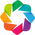

In [260]:
import pandas as pd
import geopandas as gpd
import censusdata as cd
import numpy as np
import geoviews as gv
import datetime

gv.extension('bokeh')

county_label = list(covid_map.CO_NAME)


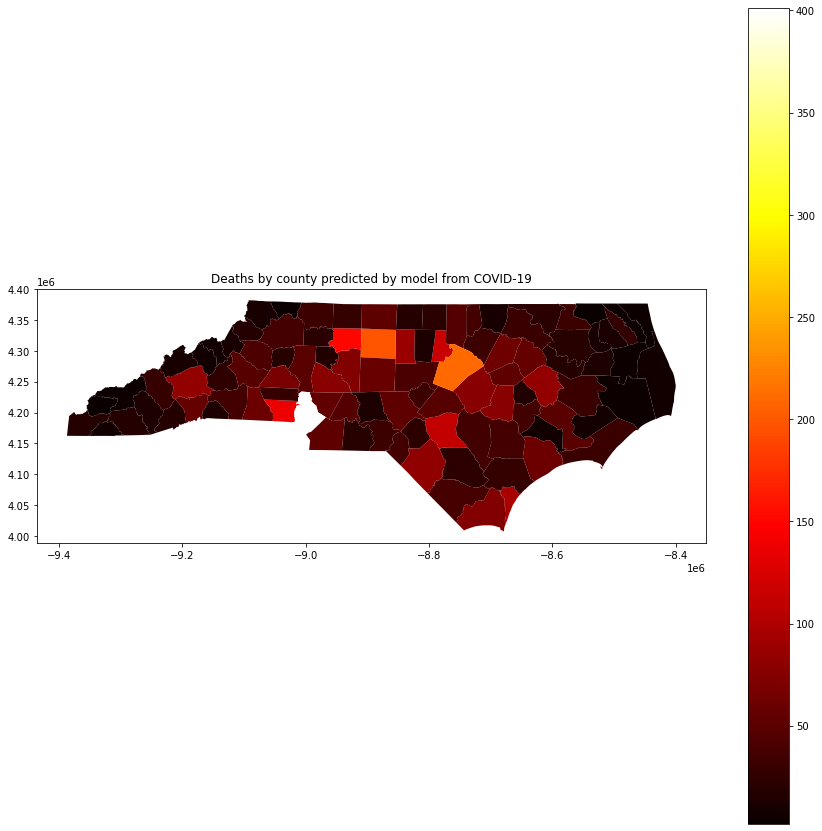

In [328]:
#### Percent of County Population lost to COVID-19 based on Predicted Deaths  #### 


covid_map.plot(cmap = 'hot', column = 'Predicted_deaths',legend = True ,figsize = (15,15))
plt.title('Deaths by county predicted by model from COVID-19');
plt.savefig('Predicted Deaths.png', bbox = 'tight')


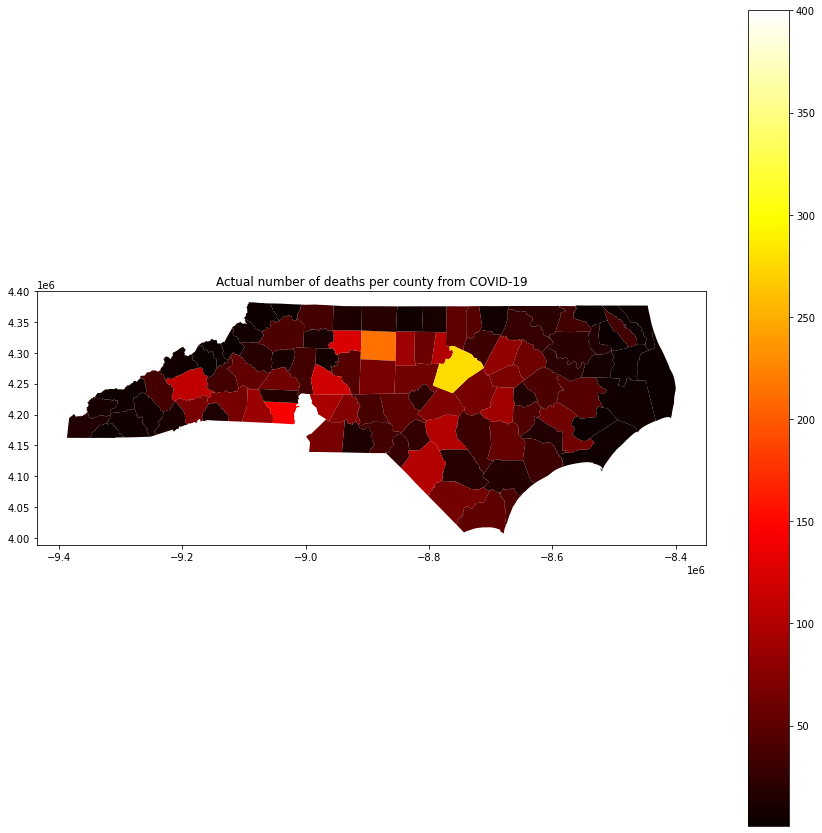

In [329]:
#### Actual Number of Deaths Related to COVID-19 ####

covid_map.plot(cmap = 'hot', column = 'Deaths',legend = True ,figsize = (15,15))
plt.title('Actual number of deaths per county from COVID-19');
plt.savefig('Actual Death.png', bbox = 'tight')

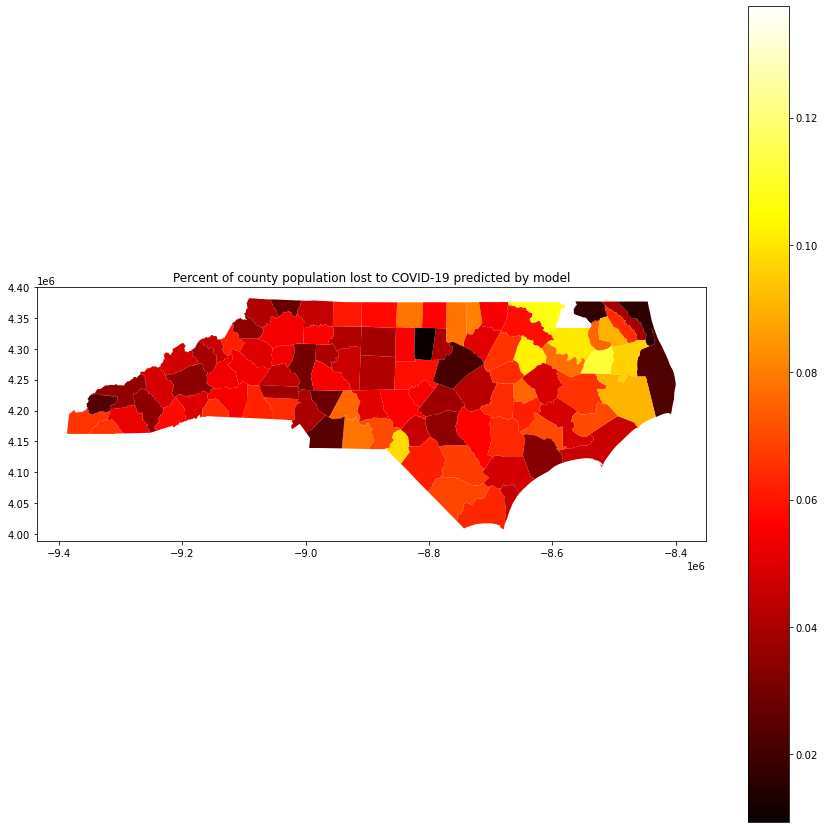

In [330]:
#### Map for predicted deaths ####

covid_map.plot(cmap = 'hot', column = 'Death Percent Predicted', legend = True, figsize = (15,15))
plt.title('Percent of county population lost to COVID-19 predicted by model');
plt.savefig('Percent loss predicted.png', bbox = 'tight')

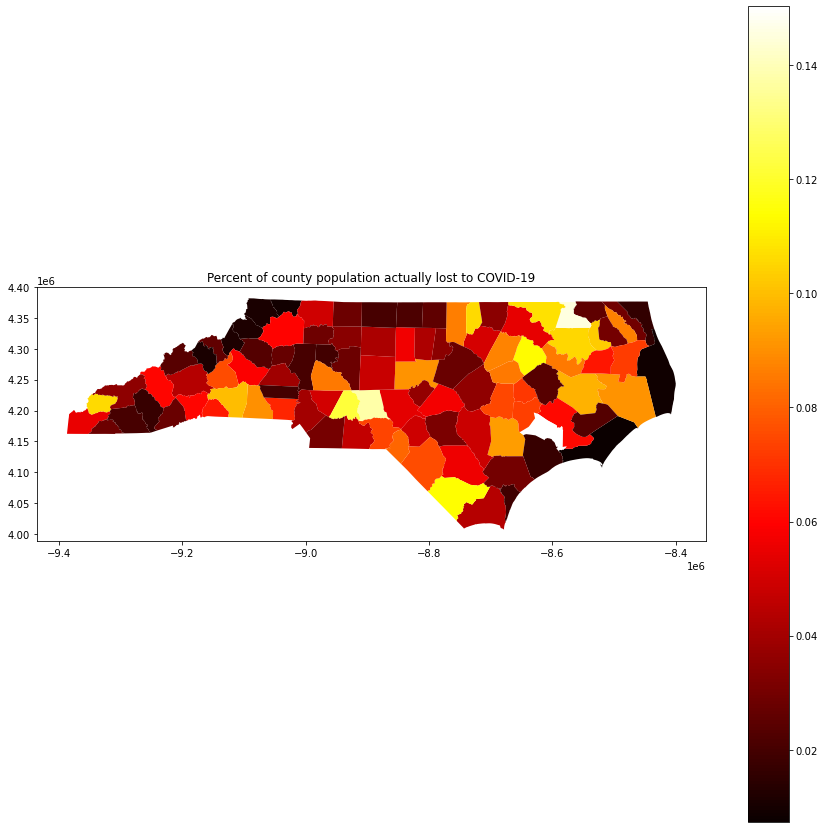

In [331]:
#### Actual proportion of county population lost to COVID-19 ####

covid_map.plot(cmap = 'hot', column = 'Death Percent Actual', legend = True, figsize = (15,15))
plt.title('Percent of county population actually lost to COVID-19');
plt.savefig('Percent Deaths actual.png')

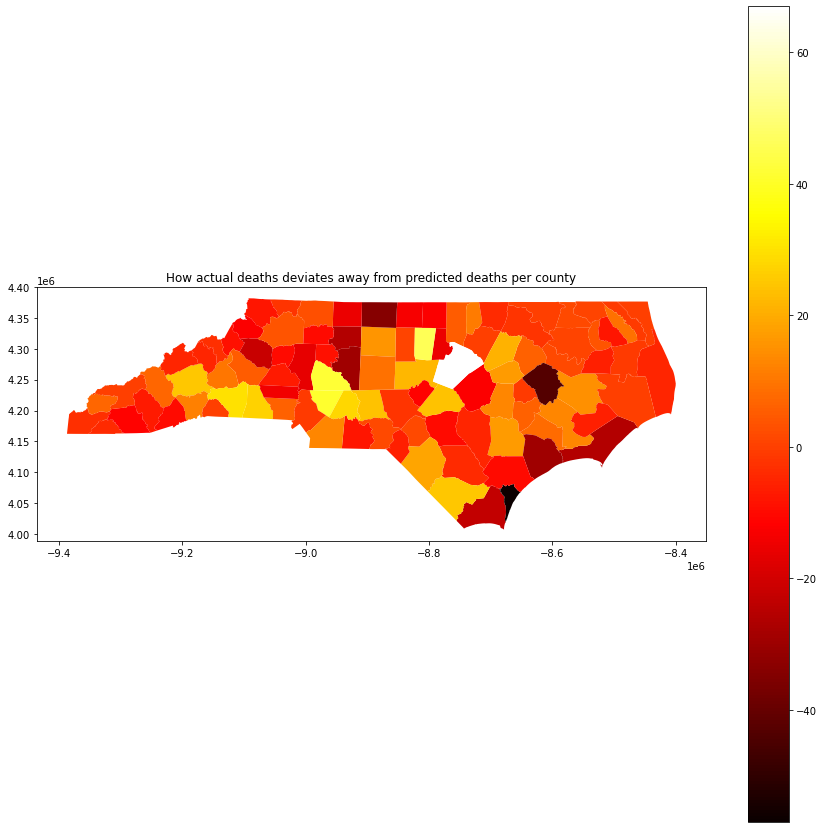

In [332]:
#### Mapping counties in terms of their deviations away from the number of predicted deaths for each county ####

covid_map.plot(cmap = 'hot', column = 'Difference', legend = True, figsize = (15,15))
plt.title('How actual deaths deviates away from predicted deaths per county');
plt.savefig('Residuals.png')

In [273]:
#### Making regional comparisons dataframes based on NC Public Health Preparedness & Response regions (both scaled and unscaled) ####

import re
regional_scaled = pd.concat([health_covid,Deaths.Predicted_deaths,Deaths.Difference,Deaths['Death Percent Predicted'], Deaths['Death Percent Actual']], axis = 1)
regional_unscaled = pd.concat([health_covid_1,Deaths.Predicted_deaths,Deaths.Difference,Deaths['Death Percent Predicted'], Deaths['Death Percent Actual']], axis = 1)

cr = 'Alamance, Caswell, Chatham, Davidson, Davie, Durham, Edgecombe, Forsyth, Franklin, Granville, Guilford, Halifax, Harnett, Johnston, Lee, Moore, Montgomery, Nash, Northampton, Orange, Person, Randolph, Richmond, Rockingham, Scotland, Stokes, Surry, Vance, Wake, Warren, Wilson, Yadkin'
er = 'Beaufort, Bertie, Bladen, Brunswick, Camden, Carteret, Chowan, Columbus, Craven, Cumberland, Currituck, Dare, Duplin, Gates, Greene, Hertford, Hoke, Hyde, Jones, Lenoir, Martin, New Hanover, Onslow, Pamlico, Pasquotank, Pender, Perquimans, Pitt, Robeson, Sampson, Tyrrell, Washington, Wayne'
cri = 'Anson, Cabarrus, Catawba, Cleveland, Gaston, Iredell, Lincoln, Mecklenburg, Rowan, Stanly, Union'
wr = 'Alexander, Alleghany, Ashe, Avery, Buncombe, Burke, Caldwell, Cherokee, Clay, Eastern Band of Cherokee Indians, Graham, Haywood, Henderson, Jackson, Macon, Madison, McDowell, Mitchell, Polk, Rutherford, Swain, Transylvania, Watauga, Wilkes, Yancey'

central_region = re.findall(r'(\w+),?',cr)
eastern_region = re.findall(r'(\w+),?',er)
cri_region = re.findall(r'(\w+),?',cri)
western_region = re.findall(r'(\w+),?',wr)

cri_scaled = pd.DataFrame()
cri_unscaled = pd.DataFrame()

cr_scaled = pd.DataFrame()
cr_unscaled = pd.DataFrame()

er_scaled = pd.DataFrame()
er_unscaled = pd.DataFrame()

wr_scaled = pd.DataFrame()
wr_unscaled = pd.DataFrame()

for county in regional_scaled.County:
    if county in cri_region:
        a = regional_scaled[regional_scaled.County == county]
        cri_scaled = pd.concat([cri_scaled,a], axis = 0)
    elif county in central_region:
        b = regional_scaled[regional_scaled.County == county]
        cr_scaled = pd.concat([cr_scaled,b], axis = 0)
    elif county in eastern_region:
        c = regional_scaled[regional_scaled.County == county]
        er_scaled = pd.concat([er_scaled,c], axis = 0)
    else:
        d = regional_scaled[regional_scaled.County == county]
        wr_scaled = pd.concat([wr_scaled,d], axis = 0)

for counties in  regional_unscaled.County:
    if counties in cri_region:
        e = regional_unscaled[regional_unscaled.County == counties]
        cri_unscaled = pd.concat([cri_unscaled,e], axis = 0)
    elif counties in central_region:
        f = regional_unscaled[regional_unscaled.County == counties]
        cr_unscaled = pd.concat([cr_unscaled,f], axis = 0)
    elif counties in eastern_region:
        g = regional_unscaled[regional_unscaled.County == counties]
        er_unscaled = pd.concat([er_unscaled,g], axis = 0)
    else:
        h = regional_unscaled[regional_unscaled.County == counties]
        wr_unscaled = pd.concat([wr_unscaled,h], axis = 0)
        
        
#### Had to manually add New Hanover into proper dataframe and remove from improper ####
NH_scaled =  wr_scaled[wr_scaled.County == 'New Hanover']
wr_scaled = wr_scaled[wr_scaled.County != 'New Hanover']
er_scaled = pd.concat([er_scaled,NH_scaled],axis = 0)

NH_unscaled =  wr_unscaled[wr_unscaled.County == 'New Hanover']
wr_unscaled = wr_unscaled[wr_unscaled.County != 'New Hanover']
er_unscaled = pd.concat([er_unscaled,NH_unscaled],axis = 0)
        

,County,Pop,Pop_65_num,Pop_AA_num,Pop_H_num,Smoker_num,Obesity_num,Diabetes_num,"Cancer_per_100,000",HIV,...,psed,Cases,"Cases Per 100,000 Residents","Cases Per 10,000 Residents",Deaths,Predicted_deaths,Predicted_deaths,Difference,Death Percent Predicted,Death Percent Actual
6,Beaufort,47242.0,9933.0,11869.0,3315.0,8966.0,16518.0,6286.0,429.0,142.0,...,5476.0,1453.0,3092.0,309.0,46.0,31.0,31.0,15.0,0.065620,0.097371
7,Bertie,19897.0,3850.0,12252.0,348.0,3447.0,7384.0,3041.0,440.0,167.0,...,1909.0,743.0,3921.0,392.0,21.0,20.0,20.0,1.0,0.100518,0.105544
8,Bladen,33876.0,6145.0,11619.0,2503.0,7319.0,12673.0,5050.0,419.0,137.0,...,4140.0,1121.0,3426.0,343.0,19.0,23.0,23.0,-4.0,0.067895,0.056087
9,Brunswick,118797.0,31083.0,12933.0,5568.0,22243.0,34486.0,13711.0,466.0,130.0,...,13891.0,2296.0,1608.0,161.0,52.0,75.0,75.0,-23.0,0.063133,0.043772
14,Camden,10210.0,1466.0,1331.0,265.0,1552.0,3209.0,1114.0,444.0,55.0,...,1696.0,144.0,1325.0,133.0,3.0,4.0,4.0,-1.0,0.039177,0.029383
15,Carteret,67727.0,14578.0,4182.0,2584.0,13425.0,19035.0,7249.0,475.0,63.0,...,9914.0,1248.0,1796.0,180.0,5.0,31.0,31.0,-26.0,0.045772,0.007383
20,Chowan,14540.0,3146.0,4999.0,473.0,2658.0,4676.0,2033.0,471.0,75.0,...,1542.0,546.0,3916.0,392.0,15.0,11.0,11.0,4.0,0.075653,0.103164
23,Columbus,56278.0,9818.0,16974.0,2658.0,12766.0,19278.0,8104.0,451.0,207.0,...,7490.0,1815.0,3270.0,327.0,64.0,39.0,39.0,25.0,0.069299,0.113721
24,Craven,102800.0,17521.0,22329.0,6564.0,19952.0,32248.0,12439.0,498.0,269.0,...,15581.0,2485.0,2433.0,243.0,63.0,50.0,50.0,13.0,0.048638,0.061284
25,Cumberland,324739.0,34529.0,118396.0,32654.0,68719.0,107891.0,38975.0,462.0,882.0,...,64095.0,7484.0,2231.0,223.0,102.0,112.0,112.0,-10.0,0.034489,0.031410


In [281]:
#### % of population lost to COVID on average per Health Prepardness and Response regions in NC along with the average predicted deaths and actual deaths per region as well (which region had the best performance?)####
#### wanted to see if there was any noticable difference in the outcomes of these prepardness regions ####
cri_1 = cri_unscaled[['County','Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num','Cases','Deaths','Predicted_deaths','Death Percent Predicted', 'Death Percent Actual']]
cr_1 = cr_unscaled[['County','Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num','Cases','Deaths','Predicted_deaths','Death Percent Predicted', 'Death Percent Actual']]
er_1 = er_unscaled[['County','Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num','Cases','Deaths','Predicted_deaths','Death Percent Predicted', 'Death Percent Actual']]
wr_1 = wr_unscaled[['County','Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num','Cases','Deaths','Predicted_deaths','Death Percent Predicted', 'Death Percent Actual']]

print('Average % COVID deaths predicted in CRI region per county:',cri_1['Death Percent Predicted'].mean())
print('Average % COVID deaths actual in CRI region per county:',cri_1['Death Percent Actual'].mean())
print('Average Predicted deaths in CRI region per county:',cri_1.Predicted_deaths.mean())
print('Average Actual deaths in CRI region per county:',cri_1.Deaths.mean(),'\n') # Number is a bit high because of Mecklenberg and Gaston

print('Average % COVID deaths predicted in Central region:',cr_1['Death Percent Predicted'].mean())
print('Average % COVID deaths actual in Central region:',cr_1['Death Percent Actual'].mean())
print('Average Predicted deaths in Central region per county:',cr_1.Predicted_deaths.mean())
print('Average Actual deaths in Central region per county:',cr_1.Deaths.mean(),'\n')

print('Average % COVID deaths predicted in Eastern region:',er_1['Death Percent Predicted'].mean())
print('Average % COVID deaths actual in Eastern region:',er_1['Death Percent Actual'].mean())
print('Average Predicted deaths in Eastern region per county:',er_1.Predicted_deaths.mean())
print('Average Actual deaths in Eastern region per county:',er_1.Deaths.mean(),'\n')

print('Average % COVID deaths predicted in Western region:',wr_1['Death Percent Predicted'].mean())
print('Average % COVID deaths actual in Western region:',wr_1['Death Percent Actual'].mean());
print('Average Predicted deaths in Western region per county:',wr_1.Predicted_deaths.mean())
print('Average Actual deaths in Western region per county:',wr_1.Deaths.mean())




Average % COVID deaths predicted in CRI region per county: 0.04913921216653261
Average % COVID deaths actual in CRI region per county: 0.05561774907207626
Average Predicted deaths in CRI region per county: Predicted_deaths    90.727273
Predicted_deaths    90.727273
dtype: float64
Average Actual deaths in CRI region per county: 100.81818181818181 

Average % COVID deaths predicted in Central region: 0.056912417197747645
Average % COVID deaths actual in Central region: 0.05636249262018021
Average Predicted deaths in Central region per county: Predicted_deaths    55.65625
Predicted_deaths    55.65625
dtype: float64
Average Actual deaths in Central region per county: 57.96875 

Average % COVID deaths predicted in Eastern region: 0.06298542847159633
Average % COVID deaths actual in Eastern region: 0.061303526177620825
Average Predicted deaths in Eastern region per county: Predicted_deaths    33.787879
Predicted_deaths    33.787879
dtype: float64
Average Actual deaths in Eastern region per c

In [282]:
cri_2 = cri_scaled[['County','Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num','Cases']]
#cri_2 = cri_2.astype({'Cases':'float64','Cases Per 100,000 Residents':'float64'})
cri_2 = cri_2.mean()
cri_2

Pop              0.209940
Pop_65_num       0.262205
Smoker_num       0.249526
Diabetes_num     0.242152
HIV              0.142704
uninsured_num    0.205365
PCP_num          0.180702
Cases            0.195945
dtype: float64

In [283]:
cri_2 = pd.DataFrame([0.209940
,0.262205
,0.249526
,0.242152
,0.142704
,0.205365
,0.180702
,0.195945])

cri_impact = pd.concat([Variable,coefficients,cri_2],axis = 1).rename(columns = {0:'Averages'})
cri_impact['effect'] = abs(cri_impact.Coefficients*cri_impact.Averages)
cri_impact.sort_values('effect',ascending = False)[:3]



,Variables,Coefficients,Averages,effect
2,Smoker_num,454.261246,0.249526,113.349992
7,Cases,455.611407,0.195945,89.274777
1,Pop_65_num,322.398533,0.262205,84.534507


In [285]:
cr_2 = cr_scaled[['County','Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num','Cases']]
cr_2 = cr_2.mean()
cr_2

Pop              0.128600
Pop_65_num       0.178057
Smoker_num       0.159215
Diabetes_num     0.154052
HIV              0.099236
uninsured_num    0.122473
PCP_num          0.117283
Cases            0.098280
dtype: float64

In [286]:
cr_2 = pd.DataFrame([0.128600
,0.178057
,0.159215
,0.154052
,0.099236
,0.122473
,0.117283
,0.098280])
cr_impact = pd.concat([Variable,coefficients,cr_2],axis = 1).rename(columns = {0:'Averages'})
cr_impact['effect'] = abs(cr_impact.Coefficients*cr_impact.Averages)
cr_impact.sort_values('effect',ascending = False)[:3]

,Variables,Coefficients,Averages,effect
2,Smoker_num,454.261246,0.159215,72.325204
1,Pop_65_num,322.398533,0.178057,57.405316
5,uninsured_num,-383.797885,0.122473,47.004878


In [288]:
er_2 = er_scaled[['County','Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num','Cases']]
#er_2 = er_2.astype({'Cases':'float64','Cases Per 100,000 Residents':'float64'})
er_2 = er_2.mean()
er_2

Pop              0.061172
Pop_65_num       0.091461
Smoker_num       0.085976
Diabetes_num     0.084892
HIV              0.060654
uninsured_num    0.061402
PCP_num          0.048328
Cases            0.049841
dtype: float64

In [289]:
er_2 = pd.DataFrame([0.061172
,0.091461
,0.085976
,0.084892
,0.060654
,0.061402
,0.048328
,0.049841])

er_impact = pd.concat([Variable,coefficients,er_2],axis = 1).rename(columns = {0:'Averages'})
er_impact['effect'] = abs(er_impact.Coefficients*er_impact.Averages)
er_impact.sort_values('effect',ascending = False)[:3]


,Variables,Coefficients,Averages,effect
2,Smoker_num,454.261246,0.085976,39.055565
1,Pop_65_num,322.398533,0.091461,29.486892
3,Diabetes_num,-288.861326,0.084892,24.522016


In [290]:
wr_2 = wr_scaled[['County','Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num','Cases']]
wr_2 = wr_2.mean()
wr_2

Pop              0.044111
Pop_65_num       0.090618
Smoker_num       0.062507
Diabetes_num     0.055944
HIV              0.017302
uninsured_num    0.045484
PCP_num          0.048488
Cases            0.029226
dtype: float64

In [292]:
wr_2 = pd.DataFrame([0.044111
,0.090618
,0.062507
,0.055944
,0.017302
,0.045484
,0.048488
,0.029226])

wr_impact = pd.concat([Variable,coefficients,wr_2],axis = 1).rename(columns = {0:'Averages'})
wr_impact['effect'] = abs(wr_impact.Coefficients*wr_impact.Averages)
wr_impact.sort_values('effect',ascending = False)[:3]

,Variables,Coefficients,Averages,effect
1,Pop_65_num,322.398533,0.090618,29.215110
2,Smoker_num,454.261246,0.062507,28.394508
5,uninsured_num,-383.797885,0.045484,17.456663


In [293]:
health_covid = pd.concat([health_covid,Deaths.Predicted_deaths,Deaths.Difference,Deaths['Death Percent Predicted'],Deaths['Death Percent Actual']],axis = 1)

In [312]:
#### Building DataFrame of Counties that voted democrate in 2020 elections ####

health_covid = health_covid.reset_index().drop(columns = 'index')
health_covid['Death Percent Actual'] = (health_covid_1['Deaths']/health_covid_1['Pop'])*100
health_covid = health_covid.rename(columns = {'Death_percent':'Death Percent Predicted'})


Dem = ['Wake', 'Durham', 'Orange', 'Pitt', 'New Hanover', 'Mecklenberg', 'Guilford', 'Cumberland', 'Buncombe', 
       'Chatham','Nash','Wilson','Watauga', 'Edgecombe', 'Anson', 'Hoke', 'Forsyth', 'Bertie', 'Hertford', 
       'Washington', 'Northampton', 'Warren', 'Vance','Pasquotank']

Democrats_scaled = pd.DataFrame()
Democrats_unscaled = pd.DataFrame()

Republicans_scaled = pd.DataFrame()
Republicans_unscaled = pd.DataFrame()

#### For Scaled Datasets ####

for county in Dem:
    z = health_covid[health_covid.County == county]
    Democrats_scaled = pd.concat([Democrats_scaled,z], axis = 0)
    

for counties in health_covid.County:
    if counties not in Dem:
        a = health_covid[health_covid.County == counties]
        Republicans_scaled = pd.concat([Republicans_scaled,a],axis = 0)

#### For Unscaled Datasets ####        
for county in Dem:
    z = health_covid_1[health_covid_1.County == county]
    Democrats_unscaled = pd.concat([Democrats_unscaled,z], axis = 0)
    

for counties in health_covid.County:
    if counties not in Dem:
        a = health_covid_1[health_covid_1.County == counties]
        Republicans_unscaled = pd.concat([Republicans_unscaled,a],axis = 0)

#### Assigning party memberships to each county for 2020 elections ####

Democrats_scaled['Party'] = 'Dem'
Democrats_unscaled['Party'] = 'Dem'

Republicans_scaled['Party'] = 'GOP'
Republicans_unscaled['Party'] = 'GOP'

health_covid = pd.concat([Republicans_scaled,Democrats_scaled], axis = 0)
health_covid_1 = pd.concat([Republicans_unscaled,Democrats_unscaled], axis = 0)
health_covid_1

,County,Pop,Pop_65_num,Pop_AA_num,Pop_H_num,Smoker_num,Obesity_num,Diabetes_num,"Cancer_per_100,000",HIV,...,Med_HHI,PCP_num,Limited_healthy_food,psed,Cases,"Cases Per 100,000 Residents","Cases Per 10,000 Residents",Deaths,Predicted_deaths,Party
0,Alamance,156489.0,24537.0,29772.0,18870.0,32908.0,52021.0,18027.0,494.0,281.0,...,43676.0,76.0,21684.0,22226.0,5493.0,3241.0,324.0,89.0,88.0,GOP
1,Alexander,37121.0,6550.0,2134.0,1605.0,8122.0,11305.0,4346.0,469.0,51.0,...,43226.0,12.0,3201.0,4095.0,1024.0,2731.0,273.0,10.0,20.0,GOP
2,Alleghany,10960.0,2579.0,165.0,1061.0,2532.0,2882.0,1271.0,417.0,0.0,...,35287.0,23.0,1597.0,1066.0,326.0,2927.0,293.0,1.0,3.0,GOP
4,Ashe,26815.0,6097.0,199.0,1310.0,5517.0,6868.0,3009.0,446.0,18.0,...,36406.0,18.0,4280.0,3063.0,513.0,1886.0,189.0,3.0,11.0,GOP
5,Avery,17680.0,3471.0,790.0,842.0,3768.0,4981.0,2067.0,484.0,30.0,...,37267.0,11.0,10.0,2542.0,668.0,3805.0,380.0,2.0,11.0,GOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Washington,12515.0,2591.0,6091.0,593.0,1944.0,4295.0,1887.0,463.0,166.0,...,34128.0,12.0,2014.0,1270.0,273.0,2358.0,236.0,8.0,14.0,Dem
65,Northampton,20486.0,4604.0,11808.0,372.0,4556.0,7127.0,3310.0,434.0,149.0,...,33182.0,6.0,2960.0,1790.0,602.0,3090.0,309.0,22.0,22.0,Dem
92,Warren,20084.0,4327.0,10333.0,734.0,3047.0,7479.0,2876.0,456.0,93.0,...,34512.0,8.0,2030.0,1930.0,503.0,2549.0,255.0,7.0,11.0,Dem
90,Vance,44358.0,7144.0,22134.0,3199.0,10862.0,15468.0,5945.0,475.0,240.0,...,35135.0,25.0,6924.0,4711.0,1265.0,2840.0,284.0,47.0,36.0,Dem


In [313]:
Democrats_1 = Democrats_scaled[['County','Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num','Cases']]
Democrats_1 = Democrats_1.mean()
Democrats_1

Pop              0.164166
Pop_65_num       0.213295
Smoker_num       0.192647
Diabetes_num     0.187475
HIV              0.143965
uninsured_num    0.151516
PCP_num          0.182573
Cases            0.120249
dtype: float64

In [336]:
Democrats_1 = pd.DataFrame([0.164166
,0.213295
,0.192647
,0.187475
,0.143965
,0.151516
,0.182573
,0.120249])


Democrats_impact = pd.concat([Variable,coefficients,Democrats_1],axis = 1).rename(columns = {0:'Averages'})
Democrats_impact['effect'] = abs(Democrats_impact.Coefficients*Democrats_impact.Averages)
Democrats_impact.sort_values('effect',ascending = False)[:3]

,Variables,Coefficients,Averages,effect
2,Smoker_num,454.261246,0.192647,87.512066
1,Pop_65_num,322.398533,0.213295,68.765995
5,uninsured_num,-383.797885,0.151516,58.151520


In [314]:
Republicans_1 = Republicans_scaled[['County','Pop','Pop_65_num','Smoker_num', 'Diabetes_num', 'HIV', 'uninsured_num', 'PCP_num','Cases']]
Republicans_1 = Republicans_1.mean()
Republicans_1

Pop              0.074364
Pop_65_num       0.115186
Smoker_num       0.100599
Diabetes_num     0.096435
HIV              0.050012
uninsured_num    0.075470
PCP_num          0.055846
Cases            0.063387
dtype: float64

In [335]:
Republicans_1 = pd.DataFrame([0.074364
,0.115186
,0.100599
,0.096435
,0.050012
,0.075470
,0.055846
,0.063387])


Republicans_impact = pd.concat([Variable,coefficients,Republicans_1],axis = 1).rename(columns = {0:'Averages'})
Republicans_impact['effect'] = abs(Republicans_impact.Coefficients*Republicans_impact.Averages)
Republicans_impact.sort_values('effect',ascending = False)[:3]

,Variables,Coefficients,Averages,effect
2,Smoker_num,454.261246,0.100599,45.698227
1,Pop_65_num,322.398533,0.115186,37.135797
5,uninsured_num,-383.797885,0.075470,28.965226


In [316]:
#### Finding the percentage of the population democratic and republican counties were projected to lose based on the model and finding what percentage of their counties they actually have lost ####

print('Democratic counties avg predicted death rate:',Democrats['Death Percent Predicted'].mean())
print('Democratic counties avg actual death rate:',Democrats['Death Percent Actual'].mean(),'\n')
print('Republican counties avg predicted death rate:',Republicans['Death Percent Predicted'].mean())
print('Republican counties avg actual death rate:',Republicans['Death Percent Actual'].mean())

#### Overall Democratic Counties by my model is predicted to lose on average .065% of their population to COVID-19 per county ####
#### Republican counties in my model are projected to lose slightly less people per county on average at .052% ####



Democratic counties avg predicted death rate: 0.061729653047070177
Democratic counties avg actual death rate: 0.055711914886745734 

Republican counties avg predicted death rate: 0.054170245437471586
Republican counties avg actual death rate: 0.053581149938203454


In [317]:
Democrats = Democrats.astype({'Cases':'float64'})
Republicans = Republicans.astype({'Cases':'float64'})

#### Getting Case Fatality Rates for all counties (only actuals count here need to make another model to get the predicted number of cases to get predicted case fatality)

Democrats['Actual Case Fatality Rate'] = (Democrats_unscaled['Deaths']/Democrats_unscaled['Cases'])*100
Republicans['Actual Case Fatality Rate'] = (Republicans_unscaled['Deaths']/Republicans_unscaled['Cases'])*100



In [318]:
#### For each Republican and Democratic county what was the Actual case fatality rate? ####
print('Average Actual Case Fatality Rate for Republican Counties:',Republicans['Actual Case Fatality Rate'].mean())
print('Average Actual Case Fatality Rate for Democratic Counties:',Democrats['Actual Case Fatality Rate'].mean())

Average Actual Case Fatality Rate for Republican Counties: 1.8456536322520027
Average Actual Case Fatality Rate for Democratic Counties: 1.969039064330189
